# Assignment 2 - CIC-1205

## Exercise 1 - Cross Validation

Student: Balthazar Paixão


In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
SEED = 57

data_folder = "../class-repo/cic1205/data/atmoseer/"
pickle_files = [
    "A602.pickle",
    "A621.pickle",
    "A627.pickle",
    "A636.pickle",
    "A652.pickle",
]


def transform_array(arr: np.ndarray) -> list:
    """
    •0 → NONE
    •(0, 5] → WEAK
    •(5, 25] → MODERATE
    •(25,50] → STRONG
    •(50, ∞] → EXTREME
    """
    arr = arr.tolist()
    for i in range(len(arr)):
        if arr[i][0] == 0:
            arr[i] = 0  # 'NONE'
        elif arr[i][0] > 0 and arr[i][0] <= 5:
            arr[i] = 1  # 'WEAK'
        elif arr[i][0] > 5 and arr[i][0] <= 25:
            arr[i] = 2  # 'MODERATE'
        elif arr[i][0] > 25 and arr[i][0] <= 50:
            arr[i] = 3  # 'STRONG'
        elif arr[i][0] > 50:
            arr[i] = 4  # 'EXTREME'
    return arr


def count_values_list(lst: list) -> dict:
    """
    Count the number of times each value appears in a list
    """
    dict_counter = {}
    for i in lst:
        dict_counter[i] = dict_counter.get(i, 0) + 1

    return dict_counter

# A602


In [3]:
a602 = f"{data_folder}{pickle_files[0]}"
file = open(a602, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

y_train = transform_array(y_train)
y_val = transform_array(y_val)
y_test = transform_array(y_test)

In [4]:
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

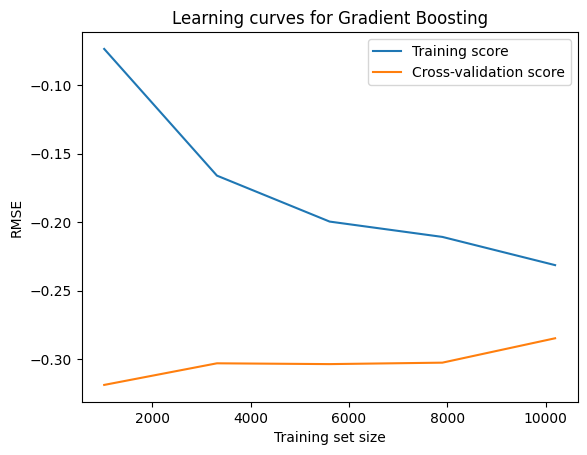

In [5]:
GB = GradientBoostingClassifier(random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

train_sizes, train_scores, test_scores = learning_curve(
    GB, X_train, y_train, cv=skf, scoring="neg_root_mean_squared_error", n_jobs=-1
)

train_scores_mean =  train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores_mean, label="Training score")
ax.plot(train_sizes, test_scores_mean, label="Cross-validation score")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.set_title("Learning curves for Gradient Boosting")
ax.legend()
plt.show()

In [6]:
params = {
    'n_iter_no_change': 100,
    'tol': 0.001,
    'random_state': SEED
}

GB = GradientBoostingClassifier(**params)

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[625  40   5   3]
 [ 36  39   8   0]
 [  3   5   1   0]
 [  0   0   0   0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       673
           1       0.46      0.47      0.47        83
           2       0.07      0.11      0.09         9
           3       0.00      0.00      0.00         0

    accuracy                           0.87       765
   macro avg       0.37      0.38      0.37       765
weighted avg       0.88      0.87      0.87       765



# A621


In [7]:
a621 = f"{data_folder}{pickle_files[1]}"
file = open(a621, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

y_train = transform_array(y_train)
y_val = transform_array(y_val)
y_test = transform_array(y_test)

In [8]:
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

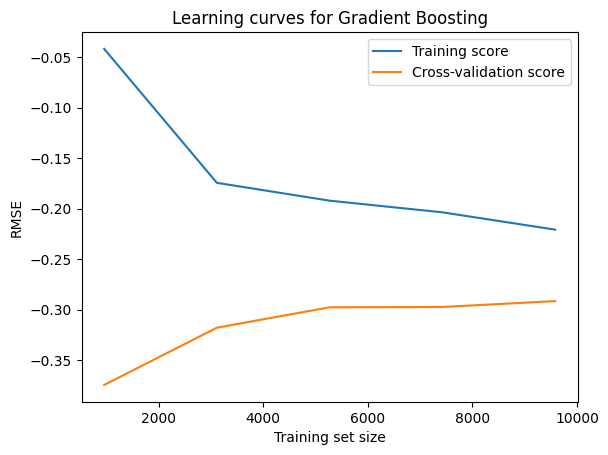

In [9]:
GB = GradientBoostingClassifier(random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

train_sizes, train_scores, test_scores = learning_curve(
    GB, X_train, y_train, cv=skf, scoring="neg_root_mean_squared_error", n_jobs=-1
)

train_scores_mean =  train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores_mean, label="Training score")
ax.plot(train_sizes, test_scores_mean, label="Cross-validation score")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.set_title("Learning curves for Gradient Boosting")
ax.legend()
plt.show()

In [10]:
params = {
    'n_iter_no_change': 100,
    'tol': 0.001,
    'random_state': SEED
}

GB = GradientBoostingClassifier(**params)

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[8895  231    1   20    0]
 [ 412  406    4   26    0]
 [  34   34    4    3    0]
 [   2    7    0    0    0]
 [   0    1    0    0    0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      9147
           1       0.60      0.48      0.53       848
           2       0.44      0.05      0.10        75
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1

    accuracy                           0.92     10080
   macro avg       0.40      0.30      0.32     10080
weighted avg       0.92      0.92      0.92     10080



# A627


In [11]:
a627 = f"{data_folder}{pickle_files[2]}"
file = open(a627, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

y_train = transform_array(y_train)
y_val = transform_array(y_val)
y_test = transform_array(y_test)

In [12]:
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

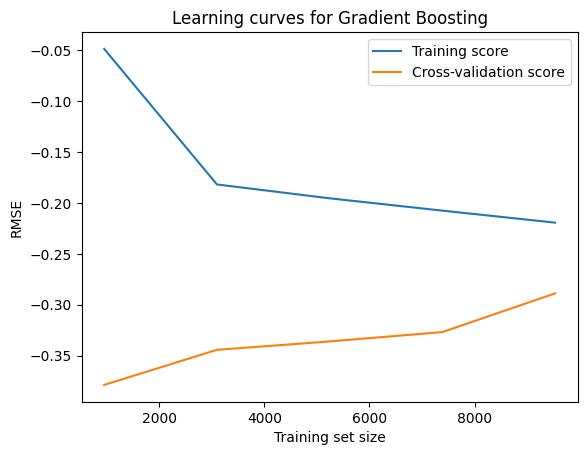

In [13]:
GB = GradientBoostingClassifier(random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

train_sizes, train_scores, test_scores = learning_curve(
    GB, X_train, y_train, cv=skf, scoring="neg_root_mean_squared_error", n_jobs=-1
)

train_scores_mean =  train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores_mean, label="Training score")
ax.plot(train_sizes, test_scores_mean, label="Cross-validation score")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.set_title("Learning curves for Gradient Boosting")
ax.legend()
plt.show()

In [14]:
params = {
    'n_iter_no_change': 100,
    'tol': 0.001,
    'random_state': SEED
}

GB = GradientBoostingClassifier(**params)

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# A636

In [15]:
a636 = f"{data_folder}{pickle_files[3]}"
file = open(a636, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

y_train = transform_array(y_train)
y_val = transform_array(y_val)
y_test = transform_array(y_test)

In [16]:
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

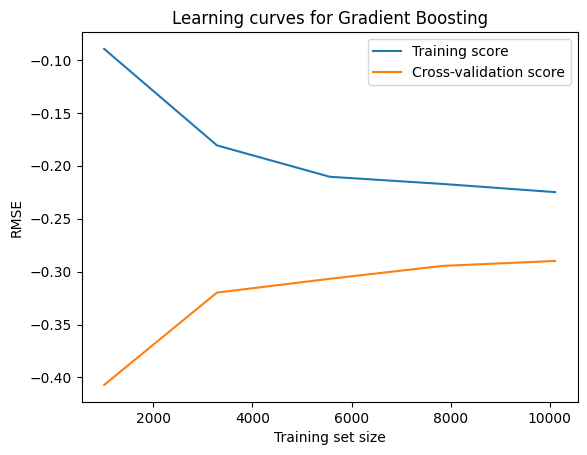

In [17]:
GB = GradientBoostingClassifier(random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

train_sizes, train_scores, test_scores = learning_curve(
    GB, X_train, y_train, cv=skf, scoring="neg_root_mean_squared_error", n_jobs=-1
)

train_scores_mean =  train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores_mean, label="Training score")
ax.plot(train_sizes, test_scores_mean, label="Cross-validation score")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.set_title("Learning curves for Gradient Boosting")
ax.legend()
plt.show()

In [18]:
params = {
    'n_iter_no_change': 100,
    'tol': 0.001,
    'random_state': SEED
}

GB = GradientBoostingClassifier(**params)

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[8728  273    9    7    0]
 [ 474  472   41    5    0]
 [  34   57   19    0    0]
 [   4    1    4    0    0]
 [   0    0    1    0    0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      9017
           1       0.59      0.48      0.53       992
           2       0.26      0.17      0.21       110
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1

    accuracy                           0.91     10129
   macro avg       0.36      0.32      0.34     10129
weighted avg       0.90      0.91      0.90     10129



# A652


In [19]:
a652 = f"{data_folder}{pickle_files[4]}"
file = open(a652, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

y_train = transform_array(y_train)
y_val = transform_array(y_val)
y_test = transform_array(y_test)

In [20]:
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

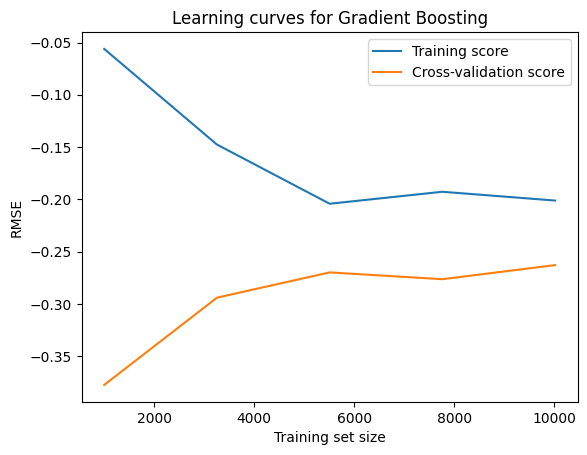

In [21]:
GB = GradientBoostingClassifier(random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

train_sizes, train_scores, test_scores = learning_curve(
    GB, X_train, y_train, cv=skf, scoring="neg_root_mean_squared_error", n_jobs=-1
)

train_scores_mean =  train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores_mean, label="Training score")
ax.plot(train_sizes, test_scores_mean, label="Cross-validation score")
ax.set_xlabel("Training set size")
ax.set_ylabel("RMSE")
ax.set_title("Learning curves for Gradient Boosting")
ax.legend()
plt.show()

In [22]:
params = {
    'n_iter_no_change': 100,
    'tol': 0.001,
    'random_state': SEED
}

GB = GradientBoostingClassifier(**params)

GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[8684   72   13    0    0]
 [ 514  225   17    1    0]
 [  27   22    1    0    0]
 [   1    2    0    1    0]
 [   1    1    0    0    0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8769
           1       0.70      0.30      0.42       757
           2       0.03      0.02      0.02        50
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         2

    accuracy                           0.93      9582
   macro avg       0.43      0.31      0.35      9582
weighted avg       0.92      0.93      0.92      9582

